## NER with Character & Token Embeddings

- Here we will focus our discussion on a technique that provides the model embeddings at multiple scales, enabling it to understand language better. That is, instead of relying only on **token embeddings**, we can also use **character embeddings**. Then a token embedding is generated with the character embeddings by shifting a convolutional window over the characters in the token.

### Using Convolution to generate Token Embeddings

A combination of character embeddings and a convolutional kernel can be used to generate token embeddings. The method will be as follows:
- Pad each token (e.g. word) to a predefined length
- Look up the character embeddings for the characters in the token from an embedding layer
- Shift a convolutional kernel over the sequence of character embeddings to generate a token embedding

<div align='center'>
    <img src='images/char_token_embedding.png'/>
</div>

- Character Embeddings:
    - Character embeddings are representations of individual characters in a text. In NLP, words are often broken down into characters, and each character is assigned a numerical vector representation. These embeddings capture semantic and syntactic information at the character level. They can be useful for handling out-of-vocabulary words, morphological analysis, and tasks that require understanding of subword structures.

- Token Embeddings:
    - Token embeddings are representations of entire words or tokens in a text. These embeddings capture the meaning and context of words within a sentence. They are generated by assigning numerical vectors to words in a way that words with similar meanings or contexts are closer to each other in the embedding space. Token embeddings are crucial for various NLP tasks like sentiment analysis, machine translation, and named entity recognition.

Generating Token Embeddings using Character Embeddings and Convolution:
One approach to generate token embeddings using character embeddings is to use a convolutional neural network (CNN). Here's a step-by-step explanation of the process:

1. **Character Embeddings:** First, each character in a word is represented using a character embedding. These embeddings can be pretrained or learned as part of the NER model. For instance, a word "apple" might be represented as a sequence of character embeddings: [char_embed('a'), char_embed('p'), char_embed('p'), char_embed('l'), char_embed('e')].

2. **Convolutional Operation:** The sequence of character embeddings is then passed through a 1-dimensional convolutional layer. This convolutional layer applies a set of filters over different character n-grams (subsequences of characters), extracting local features from the character embeddings. This process helps capture morphological and structural information of the word.

3. **Max-Pooling:** After applying the convolutional filters, a max-pooling operation is typically performed over the resulting feature maps. This operation extracts the most relevant information from each feature map by taking the maximum value. The pooled values from different feature maps are then concatenated to form a fixed-size vector.

4. **Token Embedding:** The resulting concatenated vector is considered the token embedding for the word. This token embedding captures both character-level information (morphology) and context-related features that contribute to the word's overall meaning.

Using character embeddings and convolutional operations to generate token embeddings is particularly useful when dealing with morphologically rich languages, handling misspelled words, or handling rare or out-of-vocabulary words. It allows the model to capture more fine-grained information about words, improving performance in various NLP tasks.

Certainly! "Morphological and structural information of the word" refers to details about how a word is formed and structured, including its prefixes, suffixes, and internal components. Here's a simplified example to illustrate:

Consider the word "unhappiness." Its morphological and structural information includes:
- **Prefix:** "un"
- **Root:** "happy"
- **Suffix:** "ness"

When we talk about capturing morphological and structural information using character embeddings and convolution, it means understanding these parts of the word and how they contribute to its overall meaning. In the case of "unhappiness," the character embeddings and convolution process might help the model recognize that the prefix "un" indicates negation, the root "happy" denotes the core emotion, and the suffix "ness" signifies the state of being.

This information is valuable because it allows the model to infer more about the word's meaning and how it fits into a sentence or context.

In [20]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Input
from tensorflow.keras.models import Model

# Sample character embeddings
char_embedding_dim = 16
char_vocab_size = 26  # Assuming only lowercase letters

# Sample words
words = ["apple", "banana", "orange"]

# Create a character embedding layer
char_embedding_layer = Embedding(input_dim=char_vocab_size, 
                                 output_dim=char_embedding_dim)

# Create a convolutional layer
num_filters = 32
kernel_size = 3
conv_layer = Conv1D(filters=num_filters, kernel_size=kernel_size, activation='relu')

# Create a global max pooling layer
max_pooling_layer = GlobalMaxPooling1D()

# Fully connected layer
dense_layer = Dense(64, activation='relu')

# Build the model
char_inputs = Input(shape=(None,))  # Input for character sequence
word_embedded = char_embedding_layer(char_inputs)
convolved = conv_layer(word_embedded)
pooled = max_pooling_layer(convolved)
token_embedded = dense_layer(pooled)

model = Model(inputs=char_inputs, outputs=token_embedded)

# Tokenize words into characters
max_word_length = max(len(word) for word in words)
char_sequences = np.zeros((len(words), max_word_length))
for i, word in enumerate(words):
    char_sequences[i, :len(word)] = [ord(char) - ord('a') for char in word]

# Generate embeddings
token_embeddings = model.predict(char_sequences)

print("Token Embeddings:")
print(token_embeddings.shape)

1/1 [==============================] - 0s 48ms/step
Token Embeddings:
(3, 64)


In [22]:
char_sequences

array([[ 0., 15., 15., 11.,  4.,  0.],
       [ 1.,  0., 13.,  0., 13.,  0.],
       [14., 17.,  0., 13.,  6.,  4.]])

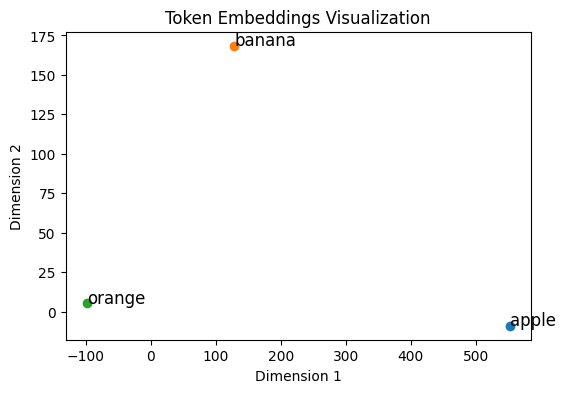

In [21]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Assuming you have 'token_embeddings' as generated in the previous code

# Use t-SNE to reduce dimensions for visualization
tsne = TSNE(n_components=2, perplexity=1, n_iter=300)
embeddings_2d = tsne.fit_transform(token_embeddings)

# Plot the embeddings
plt.figure(figsize=(6, 4))
for i, word in enumerate(words):
    x, y = embeddings_2d[i, :]
    plt.scatter(x, y)
    plt.annotate(word, (x, y), fontsize=12)
plt.title("Token Embeddings Visualization")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show();